In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers


11490434/11490434 [==============================] - 1s 0us/step


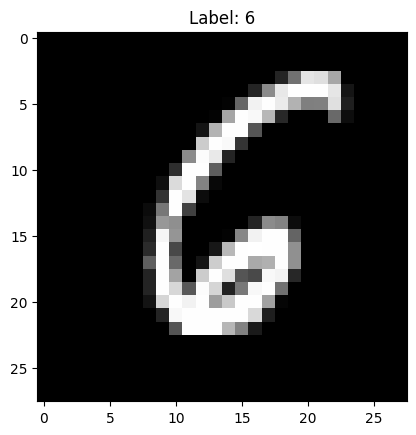

In [ ]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Combine training and test datasets to get the full dataset
x_full = np.concatenate((x_train, x_test), axis=0)
y_full = np.concatenate((y_train, y_test), axis=0)


# Function to select a specified number of samples for each category
def select_samples(x, y, num_samples):
    selected_samples = []
    selected_labels = []
    for i in range(10):  # 10 categories in MNIST
        indices = np.where(y == i)[0][:num_samples]
        selected_samples.append(x[indices])
        selected_labels.append(y[indices])
    selected_samples = np.concatenate(selected_samples, axis=0)
    selected_labels = np.concatenate(selected_labels, axis=0)
    return selected_samples, selected_labels

# Select 1,000 samples for each category
x_subset, y_subset = select_samples(x_full, y_full, 1000)

# Display one random image from x_train_subset
index = np.random.randint(0, len(x_subset))
image = x_subset[index]

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y_subset[index]}")
plt.show()



# Split the subset into training and testing sets
x_train_subset, x_test_subset, y_train_subset, y_test_subset = train_test_split(
    x_subset, y_subset, test_size=0.2, random_state=42
)



[  27  231  298  306  553  672  706  859  971  993 1018 1201 1276 1386
 1506 1532 1601 1671 1845 1939 2070 2071 2181 2222 2489 2500 2676 2680
 2842 2947 3228 3277 3325 3329 3350 3503 3582 3587 3625 3834 4027 4081
 4399 4636 4727 4756 4796 4797 4820 4947 5222 5495 5604 5647 5653 5853
 5859 5894 5935 5985 6050 6128 6273 6401 6420 6516 6538 6623 6757 6775
 7331 7376 7384 7461 7522 7532 7625 7647 7799 7848 8027 8221 8224 8242
 8385 8428 8762 8777 8854 8996 9009 9181 9292 9712 9719 9748 9804 9838
 9985 9990]
100


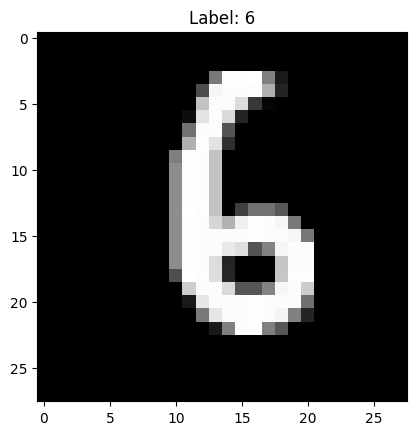

(80, 10) akfdkafdkjh (80,) (100,)


In [ ]:
np.random.seed(0)
labeled_mask = np.zeros(10000, dtype=bool)
for i in range(10):
    indices = np.where(np.array(y_subset) == i)[0] # returns shuffled array of indices of each class, total 1000 data.
    np.random.shuffle(indices)
    labeled_mask[indices[:10]] = True


print(np.where(labeled_mask)[0])

labeled_dataset_to_be_trained_index = np.where(labeled_mask)[0]
unlabeled_dataset_index = np.where(~labeled_mask)[0]



labeled_dataset_to_be_trained_x = np.array([x_subset[index]  for index in labeled_dataset_to_be_trained_index])
labeled_dataset_to_be_trained_y = np.array([y_subset[index]  for index in labeled_dataset_to_be_trained_index])

unlabeled_dataset_x = np.array([x_subset[index]  for index in unlabeled_dataset_index])
# unlabeled_dataset_y = np.array([y_subset[index]  for index in unlabeled_dataset_index])

print(len(labeled_dataset_to_be_trained_y))

unique_labels = np.unique([y for y in labeled_dataset_to_be_trained_y])




# Display one random image from x_train_subset
index = np.random.randint(0, len(labeled_dataset_to_be_trained_x))
image = labeled_dataset_to_be_trained_x[index]


# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {labeled_dataset_to_be_trained_y[index]}")
plt.show()



# train_labels_one_hot_y = keras.utils.to_categorical(unique_labels, num_classes=10)

# Split the subset into training and testing sets
labeled_x_train_subset,labeled_x_test_subset, labeled_y_train_subset, labeled_y_test_subset = train_test_split(
    labeled_dataset_to_be_trained_x, labeled_dataset_to_be_trained_y, test_size=0.2, random_state=42
)

train_labels_y = keras.utils.to_categorical(labeled_y_train_subset, num_classes=10)
test_labels_y = keras.utils.to_categorical(labeled_y_test_subset, num_classes=10)

print(train_labels_y.shape, 'akfdkafdkjh', labeled_y_train_subset.shape, labeled_dataset_to_be_trained_y.shape)





In [ ]:

# Build the neural network model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),  # Assuming input images are 28x28
    layers.Dense(200, activation='relu'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dense(10, activation='softmax')

])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(labeled_x_train_subset, train_labels_y , epochs=20, batch_size=64, validation_data=(labeled_x_test_subset, test_labels_y))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(labeled_x_test_subset, test_labels_y)
print('\nTest accuracy:', test_acc)

Epoch 1/20
2/2 [==============================] - 1s 204ms/step - loss: 161.6266 - accuracy: 0.1625 - val_loss: 61.3274 - val_accuracy: 0.2500
Epoch 2/20
2/2 [==============================] - 0s 43ms/step - loss: 62.1734 - accuracy: 0.2750 - val_loss: 53.2261 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 0s 33ms/step - loss: 32.4211 - accuracy: 0.5500 - val_loss: 37.5665 - val_accuracy: 0.5500
Epoch 4/20
2/2 [==============================] - 0s 33ms/step - loss: 15.3520 - accuracy: 0.7500 - val_loss: 32.8723 - val_accuracy: 0.6000
Epoch 5/20
2/2 [==============================] - 0s 34ms/step - loss: 5.6473 - accuracy: 0.8875 - val_loss: 37.9497 - val_accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 0s 51ms/step - loss: 3.6090 - accuracy: 0.8750 - val_loss: 45.1700 - val_accuracy: 0.4500
Epoch 7/20
2/2 [==============================] - 0s 34ms/step - loss: 2.3678 - accuracy: 0.8875 - val_loss: 47.7606 - val_accuracy: 0.4000
Epoch 8/20
2/2

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


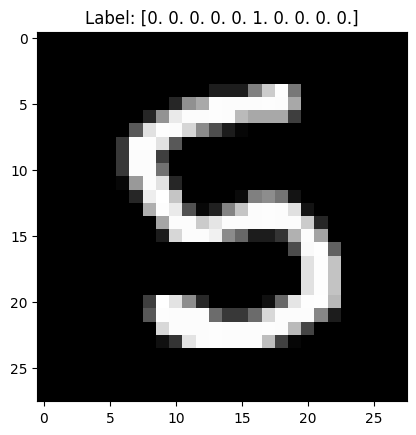

1/1 [==============================] - 0s 71ms/step
7
3/3 [==============================] - 0s 5ms/step
5 fjahjfhdalfj
(80, 10) 5
[[7.9999990e+00 5.7582928e-37 1.4942199e-10 2.3874854e-27 0.0000000e+00
  0.0000000e+00 0.0000000e+00 9.8998216e-26 4.1843429e-32 0.0000000e+00]
 [0.0000000e+00 6.9999995e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 3.6147205e-05 8.9999628e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 5.9999971e+00 2.7763719e-32
  2.6080552e-06 1.7544716e-38 1.2424220e-32 7.3789564e-34 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 4.3442769e-10 0.0000000e+00 7.9999990e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0547341e-20 1.8259950e-03 5.1833494e-13 2.5777043e-25 0.0000000e+00
  8.9981737e+00 0.0000000e+00 8.2888770e-28 9.5975409e-18 0.0000000e+00]

In [ ]:
# Entropy minimization
# Log likelihood of labelled data

# labeled_x_train_subset, train_labels_y

print(train_labels_y[0])
image = labeled_x_train_subset[0]
# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {train_labels_y[0]}")
plt.show()

single_input = np.reshape(labeled_x_test_subset[0], (1, 28, 28))
prediction = model.predict(single_input)
print(np.argmax(prediction))

# dot product of labeled one hot vector & prediction
predictions = model.predict(labeled_x_train_subset)
max_predictions_value = np.argmax(predictions)
print(max_predictions_value,'fjahjfhdalfj')
print(predictions.shape, max_predictions_value)
output_dot_product = np.dot(train_labels_y.T, predictions)
print(output_dot_product)


In [ ]:
# pseudo labels:
pseudo_label_predictions = model.predict(unlabeled_dataset_x)
max_predictions_value = np.argmax(pseudo_label_predictions)
print(max_predictions_value,'fjahjfhdalfj')
print(pseudo_label_predictions.shape, max_predictions_value)




train_labels_y_value = keras.utils.to_categorical(labeled_dataset_to_be_trained_y, num_classes=10)
#  combine labeled & unlabeled dataset:
new_train_x = np.vstack((labeled_dataset_to_be_trained_x, unlabeled_dataset_x))
new_train_y = np.vstack((train_labels_y_value, pseudo_label_predictions))


print(labeled_dataset_to_be_trained_x.shape, unlabeled_dataset_x.shape, new_train_x.shape)
print(train_labels_y.shape, pseudo_label_predictions.shape,new_train_y.shape)
# train the model with this dataset
labeled_x_train_subset_pseudo,labeled_x_test_subset_pseudo, labeled_y_train_subset_pseudo, labeled_y_test_subset_pseudo = train_test_split(
    new_train_x, new_train_y, test_size=0.2, random_state=42
)

train_labels_y_pseudo = keras.utils.to_categorical(labeled_y_train_subset_pseudo, num_classes=10)
test_labels_y_pseudo = keras.utils.to_categorical(labeled_y_test_subset_pseudo, num_classes=10)


# Train the model
model.fit(labeled_x_train_subset_pseudo, train_labels_y_pseudo , epochs=20, batch_size=64, validation_data=(labeled_x_train_subset_pseudo, test_labels_y_pseudo))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(labeled_x_test_subset_pseudo, labeled_y_test_subset_pseudo)
print('\nTest accuracy:', test_acc)



310/310 [==============================] - 2s 6ms/step
98964 fjahjfhdalfj
(9900, 10) 98964
(100, 28, 28) (9900, 28, 28) (10000, 28, 28)
(80, 10) (9900, 10) (10000, 10)
Epoch 1/20


InvalidArgumentError: ignored